построим индикаторную кривую по Вогелю

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neftpy.ureservoir as res

In [2]:
q_Vogel = np.vectorize(res.ipr_Vogel_qliq_sm3day) 
p_Vogel = np.vectorize(res.ipr_Vogel_pwf_atma)

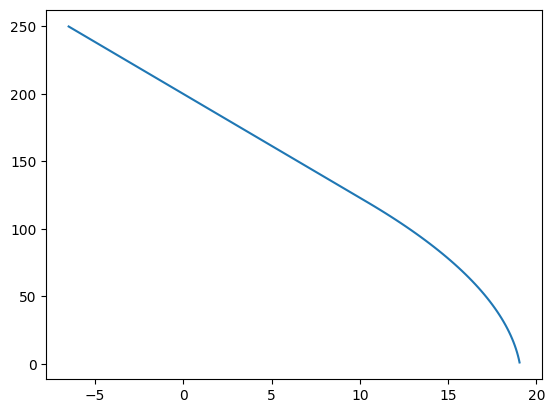

In [3]:
p = np.linspace(1, 250, 100)
q = q_Vogel(p_test_atma = p, 
            p_res_atma = 200, 
            pb_atma = 120, 
            pi_sm3dayatm = 0.13, 
            fw_perc = 0)
plt.plot(q, p)

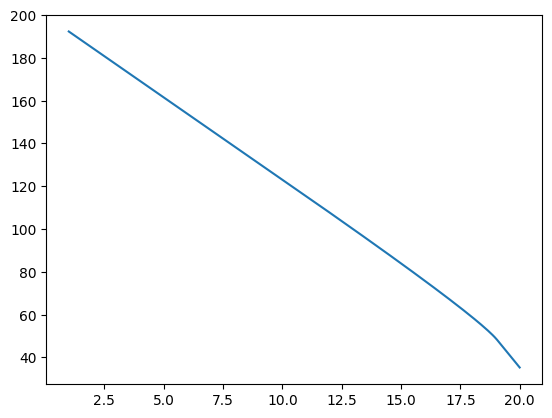

In [4]:
q = np.linspace(1, 20, 200)
p = p_Vogel(q_test_sm3day = q, 
            p_res_atma = 200, 
            pb_atma = 120, 
            pi_sm3dayatm = 0.13, 
            fw_perc = 90)
plt.plot(q, p)

In [5]:
res.ipr_Vogel_pi_sm3dayatm(q_test_sm3day = 23, 
                           p_test_sm3day = 34, 
                           p_res_sm3day = 250, 
                           pb_atma = 100, 
                           fw_perc = 0)

0.11696501220504474